# Transform Distributions

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

# 1. Simulation

To do a simulation for a uniform random variable we can apply the "Linear Congruential Generator" algorithm:

$ X_i = (a \cdot X_{i-1} + c) \ mod \ m $

$ R_i = X_i/m $

$ X_0 $ is the seed.

In [5]:
m = 5107 # prime number
c = 19
a = 17

In [6]:
N = 1_000_000

In [7]:
R = []
x = 27

In [8]:
for i in range(N):
    x = (a*x + c) % m
    r = x/m
    R.append(r)

In [9]:
df = pd.DataFrame()
df['R'] = R

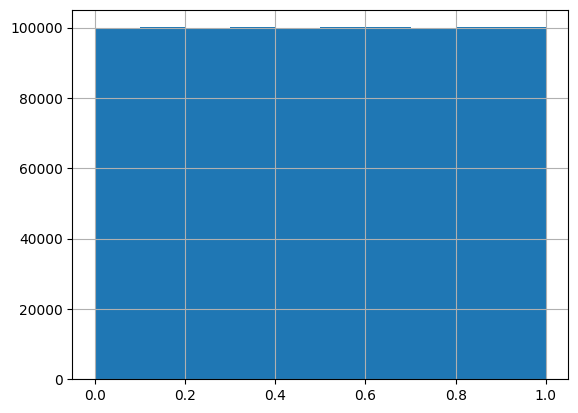

In [10]:
df['R'].hist()
plt.show()

**Comments:** Its clear that we generate a uniform random variable between $ 0 $ and $ 1 $.

In [11]:
round(df['R'].mean(), 2)

0.5

# 2. Transform distributions

If we have a random variable $ Y $ with a cumulative distribution function $ F_{Y} $ and we want apply a transformation to $ Y $ to change its distribution to $ F_{X} $.

### a. From Y to Uniform

$ Z = F_Y(Y) $

$ \Rightarrow $

$ F_Z(z) = \mathbb{P}(Z \leq z) = \mathbb{P}(F_{Y}(Y) \leq z) = \mathbb{P}(Y \leq F^{-1}_{Y}(z)) = F_Y(F^{-1}_{Y}(z)) = z $

$ \Rightarrow $

$ Z \sim Uniform(0, 1) $

**Example:** $ Y \sim Exp(\lambda = 2) \ \Rightarrow \ F_Y(y) = 1 - e^{- \frac{1}{\lambda} \cdot y} $

In [12]:
l = 2

In [13]:
Y = np.random.exponential(l, N)
Y = pd.Series(Y)

In [14]:
df = pd.DataFrame()
df['Y'] = Y

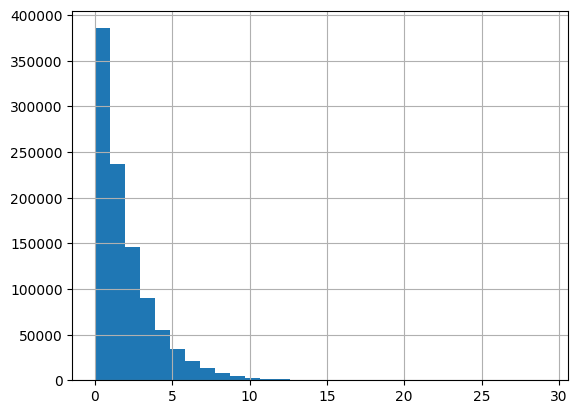

In [15]:
df['Y'].hist(bins = 30)
plt.show()

In [16]:
df['U'] = df['Y'].map(lambda x: 1 - math.exp( -(1/l)*x))

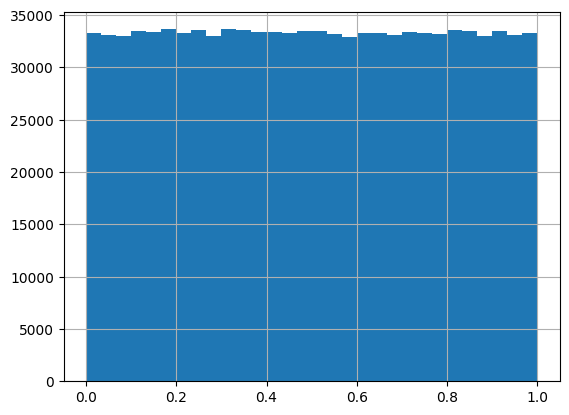

In [17]:
df['U'].hist(bins = 30)
plt.show()

###  b. From Uniform to X

$ Z = F_X^{-1}(U) $

$ \Rightarrow $

$ F_Z(z) = \mathbb{P}(Z \leq z) = \mathbb{P}(F_X^{-1}(U) \leq z) = \mathbb{P}(U \leq F_X(z)) = F_U(F_X(z)) = F_X(z) $

$ \Rightarrow $

$ Z \sim F_X(\cdot) $

**Example:** $ X \sim N(0, 1) $

In [18]:
from scipy.stats import norm

In [19]:
df['X'] = df['U'].map(lambda x: norm.ppf(x))

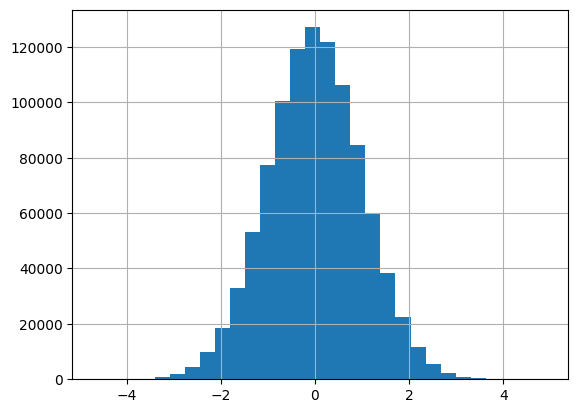

In [20]:
df['X'].hist(bins = 30)
plt.show()

### c. From Y to X

As you can see you only have to complement the two previous transformations.

$ Z = F_X^{-1}(F_Y(Y)) $

$ \Rightarrow $

$ F_Z(z) = \mathbb{P}(Z \leq z) = \mathbb{P}[F_X^{-1}(F_Y(Y)) \leq z] = \mathbb{P}[F_Y(Y) \leq F_X(z)] = \mathbb{P}(Y \leq F_Y^{-1}[F_X(z)]) = F_Y[F_Y^{-1}(F_X(z))] = F_X(z) $

$ \Rightarrow $

$ Z \sim F_X(\cdot) $

In [21]:
def function_comb(x):
    
    x =  1 - math.exp( -(1/l)*x)
    x = norm.ppf(x)

    return x

In [22]:
df['X_def'] = df['Y'].map(lambda x: function_comb(x))

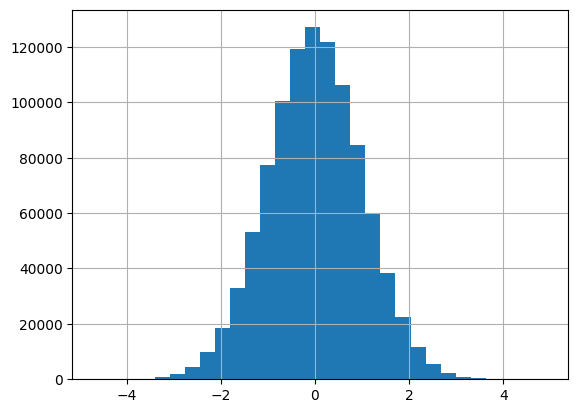

In [23]:
df['X_def'].hist(bins = 30)
plt.show()

### Time of execution

In [24]:
end = time.time()

In [25]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 1 minutes and 51 seconds.
